# Interpretação dos dados

## Tiro de Meta

**Origem da ideia:**

A forte correlação entre `Tiro de meta 1` e variáveis ofensivas do time 2 (especialmente `Chutes fora 2` - **0.67**, `Cruzamentos 2` - **0.42**, e `Posse 2(%)` - **0.38**) sugere que o time visitante está atacando muito, mas sem precisão. Isso obriga o time da casa a repor a bola com tiros de meta.

**Interpretação:**

> “O tiro de meta é geralmente uma consequência de finalizações erradas ou jogadas laterais que não resultam em chances claras. Quando o time visitante ataca mais, mas sem eficiência, o time da casa é forçado a fazer mais reposições pelo goleiro.”

---

## Substituições

**Origem da ideia:**

A correlação mais forte é entre `Substituições 1` e `Substituições 2` (**0.73**), seguida por `Laterais 1` e `Laterais 2` (**~0.44**). Isso sugere que substituições são **reativas ou contextuais** — se um time muda, o outro responde.

**Interpretação:**

> “As substituições geralmente ocorrem em momentos críticos e são influenciadas pelo ritmo do jogo. Um aumento nas laterais pode indicar cansaço dos jogadores de lado de campo, forçando mudanças táticas ou físicas pelas equipes.”

---

## Contra-ataques

**Origem da ideia:**

A correlação entre `Contra-ataques 1` e `Cruzamentos 2` é positiva (**0.20**) — ou seja, cruzamentos do time 2 estão moderadamente ligados a contra-ataques do time 1.

Há também uma correlação negativa com os `Gols 2` (**-0.20**), o que sugere que quando o time 2 ataca muito e não converte, dá margem para ser contra-atacado.

**Interpretação:**

> “O contra-ataque geralmente advém de cruzamentos mal-sucedidos, especialmente quando o time visitante falha em concluir jogadas laterais. Essa falha abre espaço para o time da casa explorar transições rápidas, especialmente se tiver atacantes velozes.”


# Vamos ver oque mudou para Gols

C:\Users\danie\AppData\Local\Temp\ipykernel_13516\1400150594.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_original_ordenadas.values,


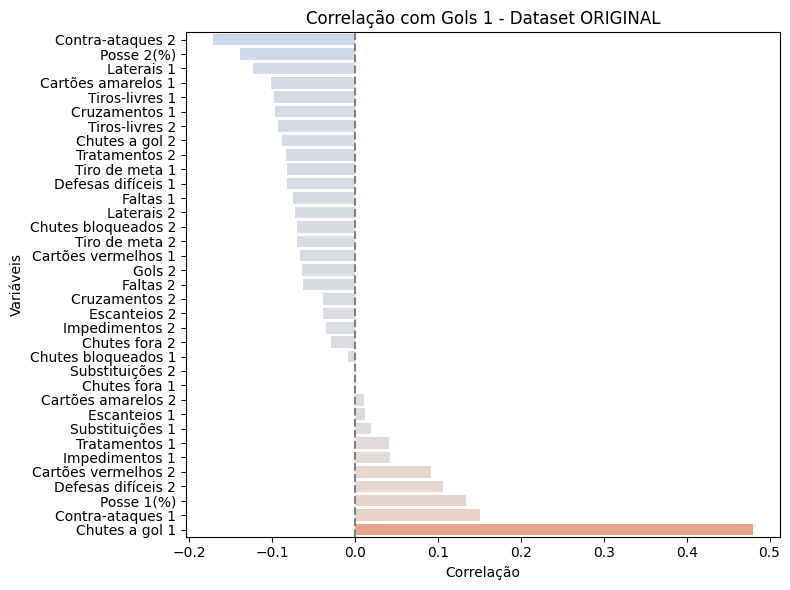

C:\Users\danie\AppData\Local\Temp\ipykernel_13516\1400150594.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_limpo_ordenadas.values,


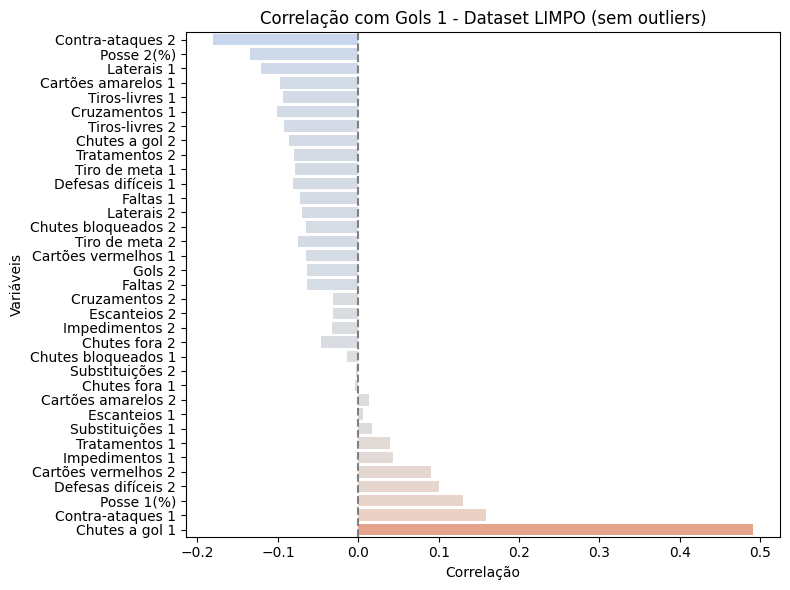

C:\Users\danie\AppData\Local\Temp\ipykernel_13516\1400150594.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diferencas_ordenadas_limpo.values,


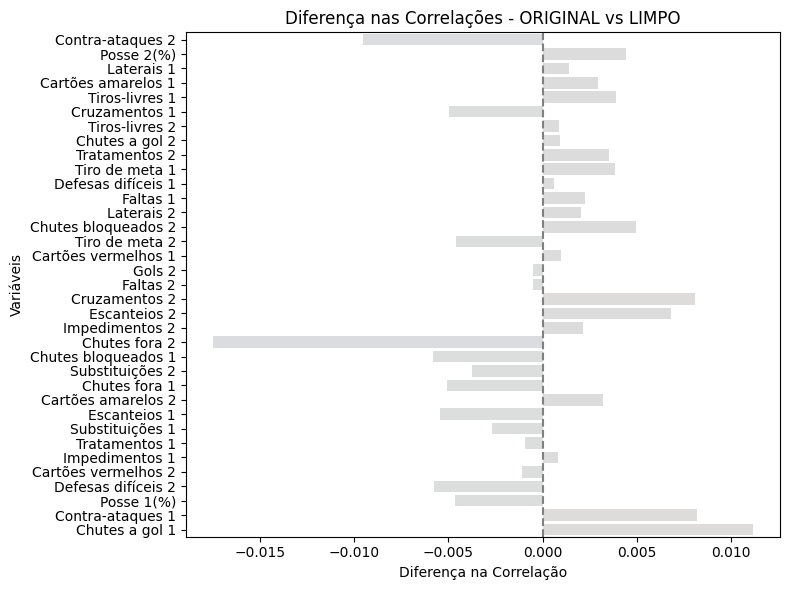

C:\Users\danie\AppData\Local\Temp\ipykernel_13516\1400150594.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_substituido_ordenadas.values,


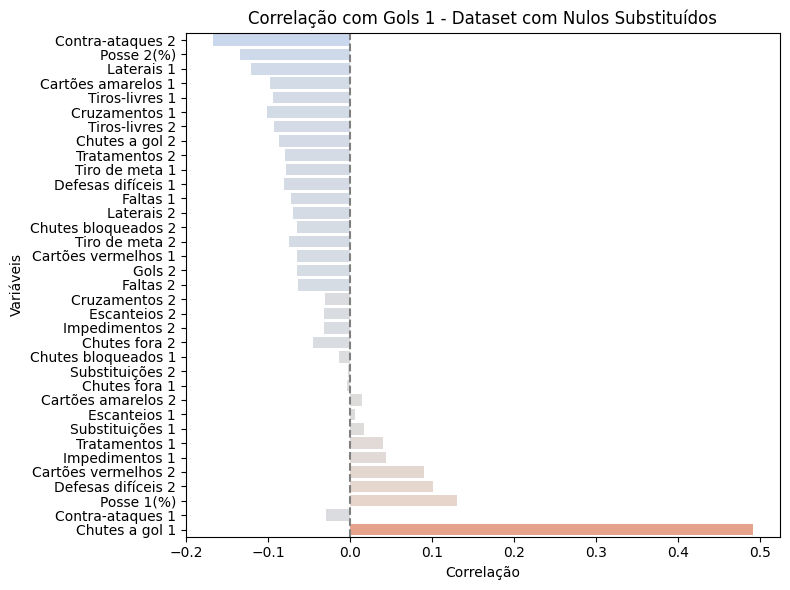

C:\Users\danie\AppData\Local\Temp\ipykernel_13516\1400150594.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diferencas_ordenadas_substituido.values,


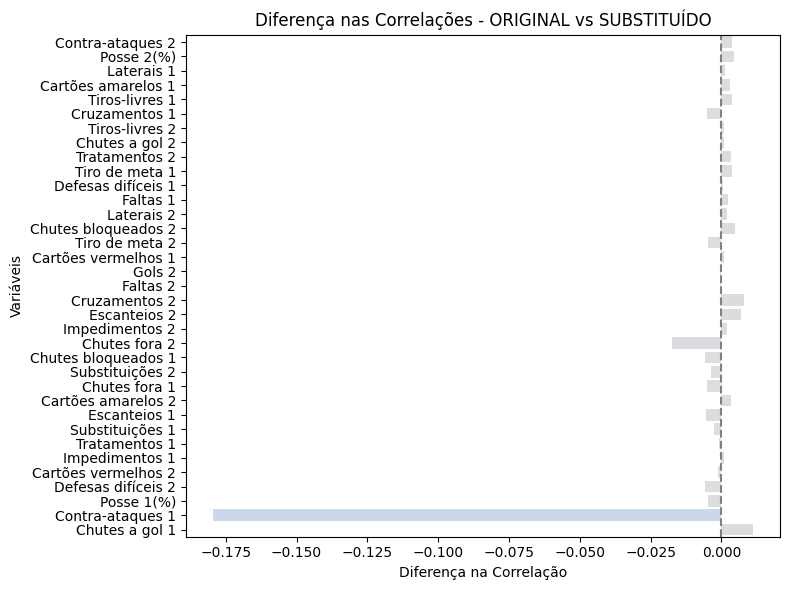

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lê os dados
df_original = pd.read_csv('entrada.csv')
df_limpo = pd.read_csv('saida_sem_outliers.csv')
df_substituido = pd.read_csv('saida_com_valores_substituidos.csv')

# Remove colunas sem variância
df_valido_original = df_original.loc[:, df_original.nunique() > 1]
df_valido_limpo = df_limpo.loc[:, df_limpo.nunique() > 1]
df_valido_substituido = df_substituido.loc[:, df_substituido.nunique() > 1]

# Filtra apenas colunas numéricas
df_numerico_original = df_valido_original.select_dtypes(include='number')
df_numerico_limpo = df_valido_limpo.select_dtypes(include='number')
df_numerico_substituido = df_valido_substituido.select_dtypes(include='number')

# Calcula correlação
correlacao_original = df_numerico_original.corr(numeric_only=True)
correlacao_limpo = df_numerico_limpo.corr(numeric_only=True)
correlacao_substituido = df_numerico_substituido.corr(numeric_only=True)

# Variável alvo
variavel_alvo = 'Gols 1'

# Filtra correlações com a variável alvo (com sinal)
correlacoes_original = correlacao_original[variavel_alvo].drop(labels=[variavel_alvo], errors='ignore')
correlacoes_limpo = correlacao_limpo[variavel_alvo].drop(labels=[variavel_alvo], errors='ignore')
correlacoes_substituido = correlacao_substituido[variavel_alvo].drop(labels=[variavel_alvo], errors='ignore')

# Interseção de variáveis comuns
variaveis_comuns = correlacoes_original.index.intersection(correlacoes_limpo.index).intersection(correlacoes_substituido.index)

# Alinha os dados
correlacoes_original = correlacoes_original.loc[variaveis_comuns]
correlacoes_limpo = correlacoes_limpo.loc[variaveis_comuns]
correlacoes_substituido = correlacoes_substituido.loc[variaveis_comuns]

# Ordena conforme o dataset original
ordem_variaveis = correlacoes_original.sort_values().index
correlacoes_original_ordenadas = correlacoes_original.loc[ordem_variaveis]
correlacoes_limpo_ordenadas = correlacoes_limpo.loc[ordem_variaveis]
correlacoes_substituido_ordenadas = correlacoes_substituido.loc[ordem_variaveis]

# Diferenças (mantendo o sinal da diferença)
diferencas_ordenadas_limpo = correlacoes_limpo_ordenadas - correlacoes_original_ordenadas
diferencas_ordenadas_substituido = correlacoes_substituido_ordenadas - correlacoes_original_ordenadas

# Função para gerar cores com base no sinal
def gerar_cores_signed(valores, cmap_name='coolwarm'):
    norm = plt.Normalize(-1, 1)  # assume que correlações estão entre -1 e 1
    cmap = plt.get_cmap(cmap_name)
    return [cmap(norm(v)) for v in valores]

# --- Plot 1: Dataset original ---
plt.figure(figsize=(8, 6))
cores1 = gerar_cores_signed(correlacoes_original_ordenadas.values)
sns.barplot(x=correlacoes_original_ordenadas.values,
            y=correlacoes_original_ordenadas.index,
            palette=cores1)
plt.title(f'Correlação com {variavel_alvo} - Dataset ORIGINAL')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# --- Plot 2: Dataset limpo (sem outliers) ---
plt.figure(figsize=(8, 6))
cores2 = gerar_cores_signed(correlacoes_limpo_ordenadas.values)
sns.barplot(x=correlacoes_limpo_ordenadas.values,
            y=correlacoes_limpo_ordenadas.index,
            palette=cores2)
plt.title(f'Correlação com {variavel_alvo} - Dataset LIMPO (sem outliers)')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# --- Plot 3: Diferença entre original e limpo ---
plt.figure(figsize=(8, 6))
cores3 = gerar_cores_signed(diferencas_ordenadas_limpo.values)
sns.barplot(x=diferencas_ordenadas_limpo.values,
            y=diferencas_ordenadas_limpo.index,
            palette=cores3)
plt.title(f'Diferença nas Correlações - ORIGINAL vs LIMPO')
plt.xlabel('Diferença na Correlação')
plt.ylabel('Variáveis')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# --- Plot 4: Dataset com valores substituídos ---
plt.figure(figsize=(8, 6))
cores4 = gerar_cores_signed(correlacoes_substituido_ordenadas.values)
sns.barplot(x=correlacoes_substituido_ordenadas.values,
            y=correlacoes_substituido_ordenadas.index,
            palette=cores4)
plt.title(f'Correlação com {variavel_alvo} - Dataset com Nulos Substituídos')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# --- Plot 5: Diferença entre original e substituído ---
plt.figure(figsize=(8, 6))
cores5 = gerar_cores_signed(diferencas_ordenadas_substituido.values)
sns.barplot(x=diferencas_ordenadas_substituido.values,
            y=diferencas_ordenadas_substituido.index,
            palette=cores5)
plt.title(f'Diferença nas Correlações - ORIGINAL vs SUBSTITUÍDO')
plt.xlabel('Diferença na Correlação')
plt.ylabel('Variáveis')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()
